# Code Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from naive_bayes_classifier import NaiveBayes

# Reading the Data

In [2]:
inflammation_data = pd.read_csv('./inflammation_diagnosis.csv', delimiter=';')

# Inspecting the Data

In [3]:
inflammation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         120 non-null    float64
 1   nausea              120 non-null    object 
 2   lumbar_pain         120 non-null    object 
 3   urine_pushing       120 non-null    object 
 4   micturition_pains   120 non-null    object 
 5   burning_of_urethra  120 non-null    object 
 6   inflammation        120 non-null    object 
 7   nephritis           120 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.6+ KB


In [4]:
inflammation_data.head()

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


# Plot the data

plot with seaborn, use different colors and sort the values by colors

In [5]:
import seaborn as sns

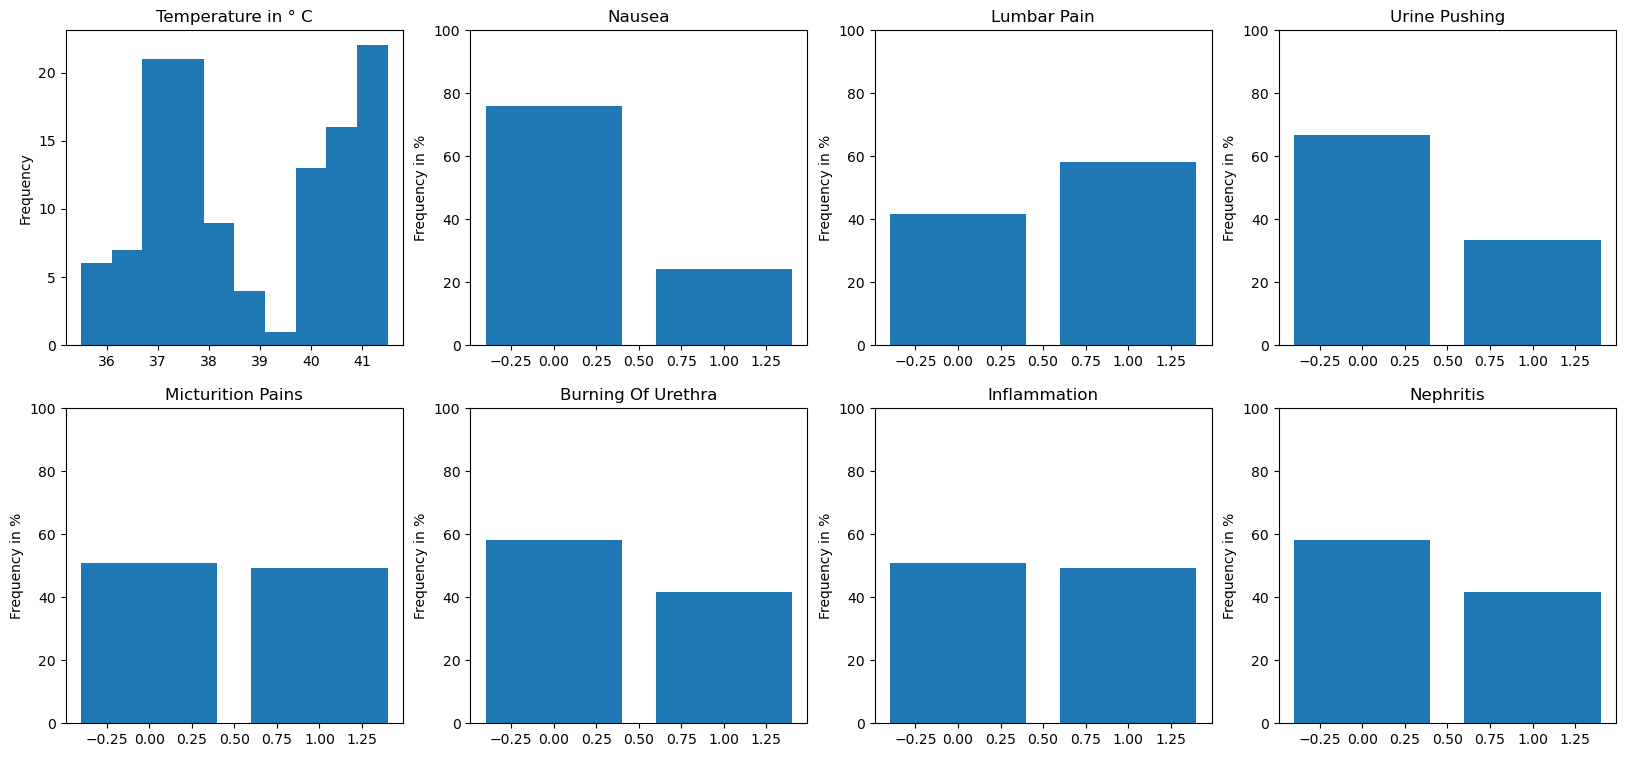

In [18]:
rows = 2
columns = 4
fig,ax = plt.subplots(nrows=rows, ncols=columns, figsize=(20,9))
[""]
index = 0 

for row in range(rows):
    for column in range(columns):
        nice_col_name = inflammation_data.columns.to_list()[index]
        nice_col_name = " ".join(word[0].upper() + word[1:] for word in nice_col_name.split("_"))
        
        if inflammation_data.columns[index] == 'temperature':
            ax[row,column].hist(x=inflammation_data[inflammation_data.columns[index]])
            ax[row,column].set_title('Temperature in ° C')
            ax[row,column].set_ylabel("Frequency")
        else:
            ax[row,column].bar(inflammation_data[inflammation_data.columns[index]].unique(),inflammation_data[inflammation_data.columns[index]].value_counts().values/len(inflammation_data)*100)
            ax[row,column].set_ylabel('Frequency in %')
            ax[row,column].set_ylim(0,100)
            ax[row, column].set_title(nice_col_name)
        index += 1

# Creating Labels
## Transforming Nominal Data to Booleans

In [7]:
inflammation_data = inflammation_data.replace(to_replace='no', value=False)
inflammation_data = inflammation_data.replace(to_replace='yes', value=True)

inflammation_data

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis
0,35.5,False,True,False,False,False,False,False
1,35.9,False,False,True,True,True,True,False
2,35.9,False,True,False,False,False,False,False
3,36.0,False,False,True,True,True,True,False
4,36.0,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
115,41.4,False,True,True,False,True,False,True
116,41.5,False,False,False,False,False,False,False
117,41.5,True,True,False,True,False,False,True
118,41.5,False,True,True,False,True,False,True


Checking if the columns are indeed of type boolean

In [8]:
inflammation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         120 non-null    float64
 1   nausea              120 non-null    bool   
 2   lumbar_pain         120 non-null    bool   
 3   urine_pushing       120 non-null    bool   
 4   micturition_pains   120 non-null    bool   
 5   burning_of_urethra  120 non-null    bool   
 6   inflammation        120 non-null    bool   
 7   nephritis           120 non-null    bool   
dtypes: bool(7), float64(1)
memory usage: 1.9 KB


## Adding Disease Labels 
Add the disease values to a new label-column and check if the values make sense

In [9]:
inflammation_data['disease'] = [False if (inflammation_data['inflammation'][i] == False) & (inflammation_data['nephritis'][i] == False) else True for i in range(0,len(inflammation_data))]

# Splitting the Data
Count the values of 'disease' to see how the data is distributed

In [ ]:
inflammation_data['disease'].value_counts(True)

## Calculating Split Indices
The data split must account for the obvious imbalance in the data. Therefore, calculate the indices of the splits.

In [41]:
train = pd.concat([inflammation_data[inflammation_data['disease'] == True].sample(frac =0.8), inflammation_data[inflammation_data['disease'] == False].sample(frac = 0.8)])
test = inflammation_data.drop(train.index)

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis,disease
3,36.0,False,False,True,True,True,True,False,True
8,36.3,False,False,True,True,True,True,False,True
9,36.6,False,False,True,True,True,True,False,True
18,36.9,False,False,True,True,True,True,False,True
19,36.9,False,True,False,False,False,False,False,False
20,37.0,False,False,True,True,False,True,False,True
31,37.2,False,False,True,True,False,True,False,True
41,37.5,False,True,False,False,False,False,False,False
48,37.7,False,False,True,True,False,True,False,True
56,37.9,False,False,True,True,False,True,False,True


## Ensuring that the two dataframes do not share a column
The following merge shows duplicate rows across the two dataframes. If empty, there are no duplicates.

In [14]:
result = train.merge(right=test, how='inner', indicator=False)
result

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis,disease


# TESTING

In [16]:
test = NaiveBayes()
prior = test.calculate_prior(train,'disease')


In [17]:
train

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis,disease
1,35.9,False,False,True,True,True,True,False,True
3,36.0,False,False,True,True,True,True,False,True
6,36.2,False,False,True,True,True,True,False,True
8,36.3,False,False,True,True,True,True,False,True
9,36.6,False,False,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...
57,37.9,False,True,False,False,False,False,False,False
73,40.0,False,False,False,False,False,False,False,False
74,40.0,False,False,False,False,False,False,False,False
80,40.2,False,False,False,False,False,False,False,False


# positiv posterior soll grösser sein als negative posterior

evidence noch berechnen mit negative and ppositive posterior 